In [88]:
from sklearn.datasets import load_iris
import pandas as pd

In [89]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [90]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [91]:
#checking missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [92]:
# Find duplicate rows
duplicate_rows = df[df.duplicated()]
duplicate_rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
142,5.8,2.7,5.1,1.9,2


In [93]:
df=df.drop_duplicates()

In [94]:
#check basic statistics (mean, min, max, etc.)
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [95]:
df['target'].unique()

array([0, 1, 2])

In [96]:
# Check class Inbalance
print(df['target'].value_counts())

target
0    50
1    50
2    49
Name: count, dtype: int64


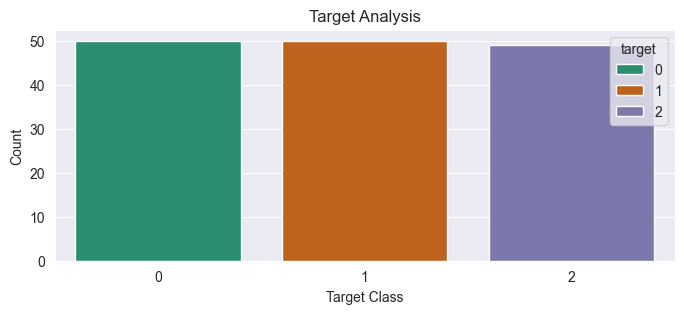

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count plot
plt.figure(figsize=(8, 3))
sns.countplot(data=df, x='target', hue='target', palette='Dark2')

# Add labels and title
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('Target Analysis')
plt.show()


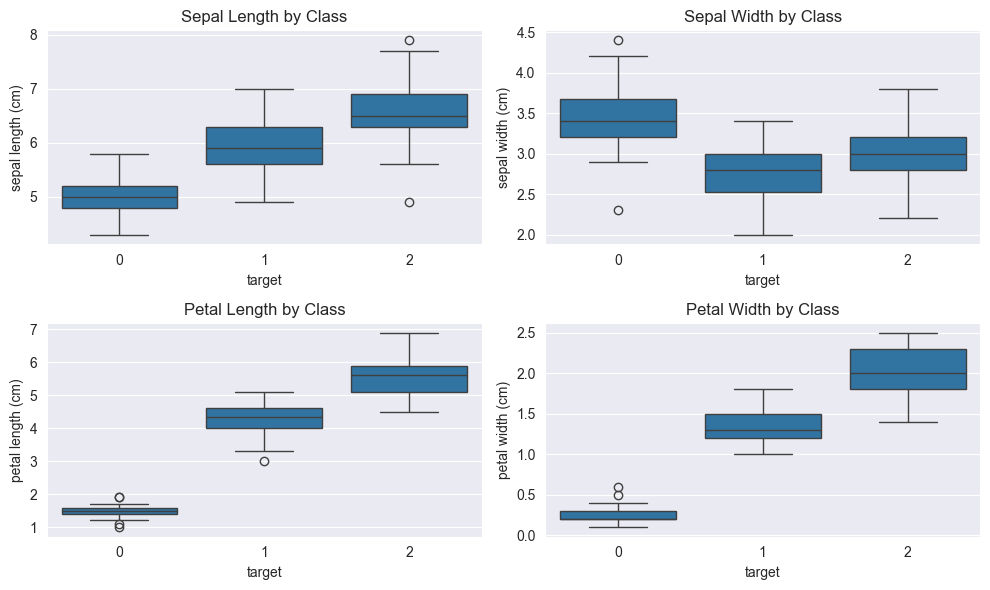

In [98]:
# Outlier Detection
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x='target', y='sepal length (cm)', data=df)
plt.title('Sepal Length by Class')

plt.subplot(2, 2, 2)
sns.boxplot(x='target', y='sepal width (cm)', data=df)
plt.title('Sepal Width by Class')

plt.subplot(2, 2, 3)
sns.boxplot(x='target', y='petal length (cm)', data=df)
plt.title('Petal Length by Class')

plt.subplot(2, 2, 4)
sns.boxplot(x='target', y='petal width (cm)', data=df)
plt.title('Petal Width by Class')

plt.tight_layout()
plt.show()

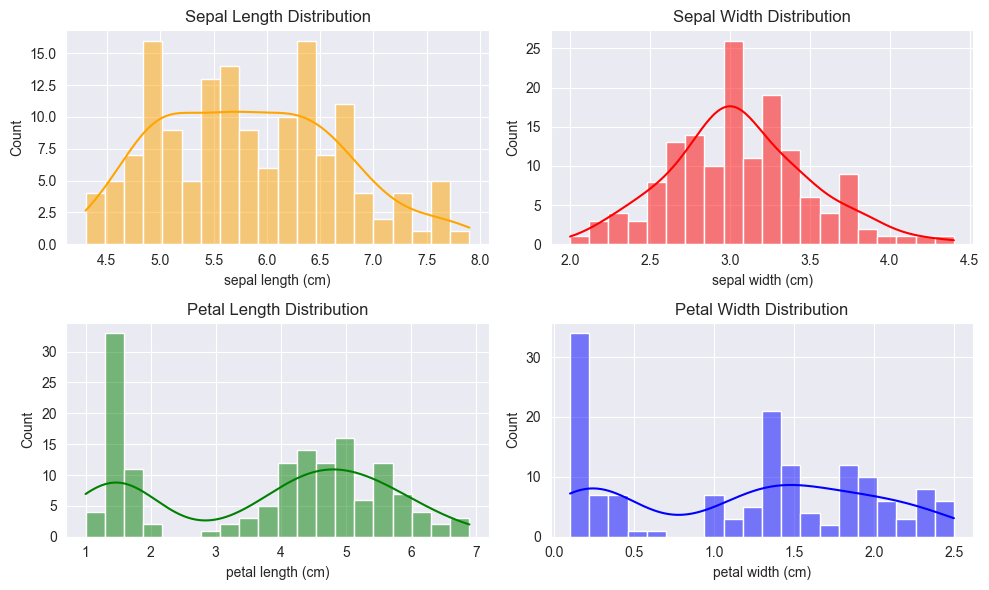

In [99]:
#Distributions of each feature
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['sepal length (cm)'], kde=True, bins=20, color='orange')
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['sepal width (cm)'], kde=True, bins=20, color='red')
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['petal length (cm)'], kde=True, bins=20, color='green')
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['petal width (cm)'], kde=True, bins=20, color='blue')
plt.title('Petal Width Distribution')

plt.tight_layout()
plt.show()


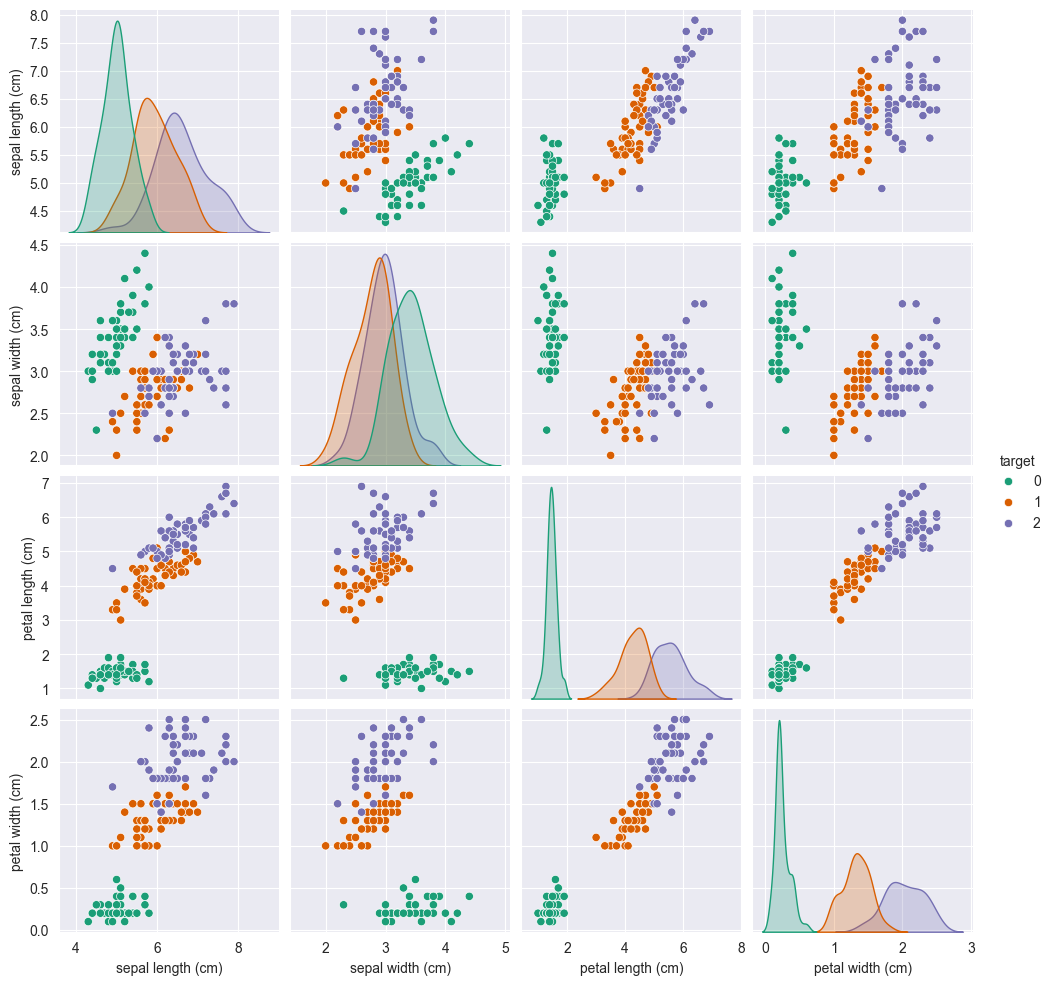

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='target',palette='Dark2')
plt.show()

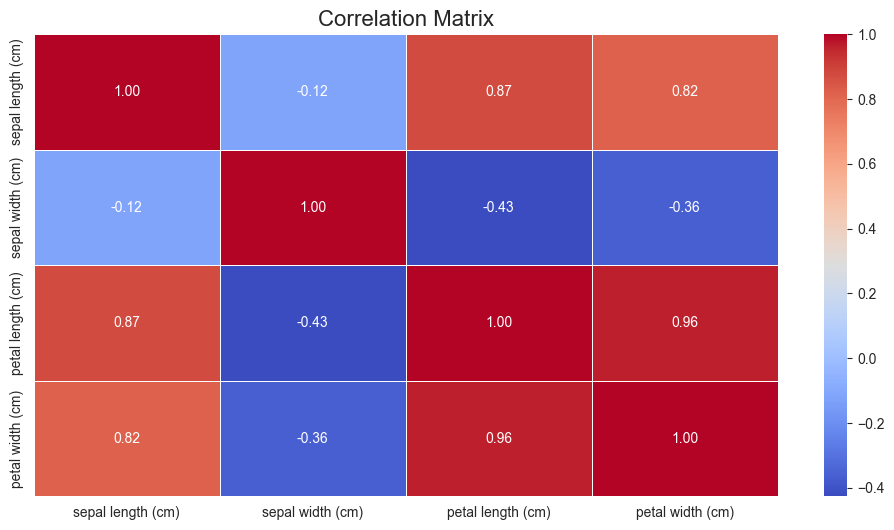

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define x as the features (excluding the target column)
x = df.drop(columns='target')

# Compute the correlation matrix
cor = x.corr()

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title('Correlation Matrix', fontsize=16)
plt.show()


In [102]:
x=df.drop('target', axis=1)
y=df['target']

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Split the data (assuming x contains features and y contains labels)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize models
gb_model = GradientBoostingClassifier()
ada_model = AdaBoostClassifier()
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()
svm_model = SVC()
lr_model = LogisticRegression()

# List of models
models = [gb_model, ada_model, rf_model, dt_model, svm_model, lr_model]

# Evaluate on both training and test sets
print("Training and Test Set Performance:")
for model in models:
    model.fit(x_train, y_train)
    train_accuracy = model.score(x_train, y_train)  # Training set accuracy
    test_accuracy = model.score(x_test, y_test)    # Test set accuracy
    print(f"{model.__class__.__name__}:")
    print(f"  Training Accuracy: {train_accuracy:.2f}")
    print(f"  Test Accuracy: {test_accuracy:.2f}")


Training and Test Set Performance:
GradientBoostingClassifier:
  Training Accuracy: 1.00
  Test Accuracy: 1.00
AdaBoostClassifier:
  Training Accuracy: 1.00
  Test Accuracy: 0.93
RandomForestClassifier:
  Training Accuracy: 1.00
  Test Accuracy: 1.00
DecisionTreeClassifier:
  Training Accuracy: 1.00
  Test Accuracy: 1.00
SVC:
  Training Accuracy: 0.97
  Test Accuracy: 1.00
LogisticRegression:
  Training Accuracy: 0.97
  Test Accuracy: 1.00


In [104]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
